In [377]:
# ARIMA models
# RNN
# Frank gave meetup on RNNs
# Keras has example using time series
# maybe add ambient baseline temperature based on zipcode for that area, compare deviation

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filename = 'one_hive_data.csv'
df_0 = pd.read_csv(filename, parse_dates=[['date', 'time', 'ampm']], converters={'zip_code': lambda x: '0'+str(x) if len(str(x)) == 4 else str(x)})

In [8]:
list(df.zip_code.unique())

['97212',
 '55901',
 '02458',
 '23236',
 '48823',
 '84020',
 '63025',
 '03467',
 '12601',
 '08350',
 '08628',
 '97230',
 '22030',
 '22657',
 '20782',
 '30259',
 '28781',
 '49448',
 '23069',
 '80504',
 '77077',
 '07930',
 '11790',
 '02115',
 '15613',
 '31701',
 '07960',
 '54115',
 '43071',
 '23464',
 '19354',
 '60305',
 '99019',
 '18901',
 '29483',
 '94117',
 '38804',
 '53223',
 '02764',
 '24078',
 '48623',
 '60137',
 '80524',
 '77502',
 '30533',
 '49006',
 '22101',
 '64019',
 '60565',
 '43311',
 '98250',
 '75979',
 '72205',
 '20861',
 '23153',
 '45373',
 '11721',
 '28671',
 '47201']

In [5]:
df = df_0.drop_duplicates()
df = df.sort_values(['date_time_ampm'])#.reset_index(drop=True)
df = df[np.abs(df.temperature-df.temperature.mean())<=(4*df.temperature.std())]
df['lookup'].fillna(value=df.zip_code, inplace = True)
df = df.drop('lookup2', axis = 1)
# df.temperature.quantile(0.999)

In [1]:
for code in df_0[(df_0['lookup2'] == df_0.zip_code)].zip_code.unique():
    print(code, len(df_0[df_0.zip_code == code]['lookup'].unique()))

NameError: name 'df_0' is not defined

In [36]:
df.date_time_ampm.max()

Timestamp('2017-04-12 13:19:04')

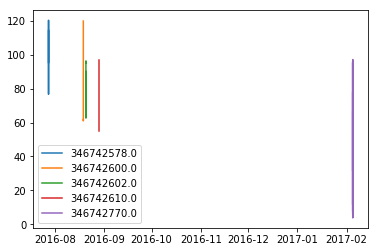

In [211]:
for code in df.zip_code.unique()[3:4]:
    df_code = df[(df.zip_code == code)]
    for probe in df_code['lookup'].unique():
        df_probe = df_code[(df_code['lookup'] == probe)]
        if np.isnan(probe):
            plt.plot(df_probe.date_time_ampm, df_probe['temperature'], label='{}'.format(code))
        else:
            plt.plot(df_probe.date_time_ampm, df_probe['temperature'], label='{}'.format(probe))
plt.legend()

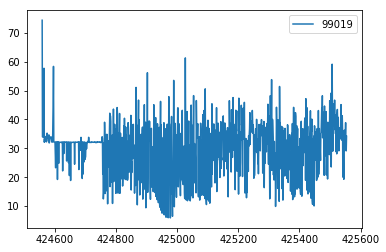

In [235]:
code = 3467
code = 99019
df_code = df[(df.zip_code == code)]
plt.plot(df_code.index, df_code['temperature'], label='{}'.format(code))
plt.legend()

In [329]:
code = 3467
# code = 99019
df_code = df[(df.zip_code == code)]
# for probe in df_code['lookup'].unique():
#     df_probe = df_code[(df_code['lookup'] == probe)]
#     plt.plot(df_probe.date_time_ampm, df_probe['temperature'], label='{}'.format(probe))
# plt.legend()
probe = 346742770.0
df_probe = df_code[(df_code['lookup'] == probe)]

AttributeError: 'Series' object has no attribute 'zip_code'

In [305]:
# plt.plot(df_probe['time'].sort_index(), df_probe.temperature.sort_index())
df_code

,date_time_ampm,zip_code,latitude,logitude,temperature,lookup,lookup2
424559,2017-01-01 01:04:24,99019,47.63,-117.09,74.37,NaN,NaN
424560,2017-01-01 20:16:18,99019,47.63,-117.09,33.98,NaN,NaN
424561,2017-01-01 20:16:19,99019,47.63,-117.09,33.88,NaN,NaN
424564,2017-01-01 20:16:20,99019,47.63,-117.09,33.88,NaN,NaN
424565,2017-01-01 20:16:20,99019,47.63,-117.09,57.73,NaN,NaN
424563,2017-01-01 20:16:20,99019,47.63,-117.09,33.93,NaN,NaN
424567,2017-01-01 20:16:21,99019,47.63,-117.09,33.21,NaN,NaN
424569,2017-01-01 20:16:21,99019,47.63,-117.09,33.88,NaN,NaN
424568,2017-01-01 20:16:21,99019,47.63,-117.09,32.33,NaN,NaN
424566,2017-01-01 20:16:21,99019,47.63,-117.09,32.11,NaN,NaN


In [239]:
filename = 'one_hive_data.csv'
df_1 = pd.read_csv(filename)

In [262]:
df_other = df_1.drop_duplicates()
df_other = df_other.sort_values(['date','time','ampm'])#.reset_index(drop=True)
df_other = df_other[np.abs(df_other.temperature-df_other.temperature.mean())<=(4*df_other.temperature.std())]

In [295]:
code = 3467
# code = 99019
df_code = df_other[(df_other.zip_code == code)]
for probe in df_code['lookup'].unique():
    probe = 346742770.0
    df_probe = df_code[(df_code['lookup'] == probe)]

In [6]:
df.head()

,date_time_ampm,zip_code,latitude,logitude,temperature,lookup
389921,2016-04-15 00:37:59,97212,45.54,-122.64,62.30,97212
389922,2016-04-15 00:44:34,97212,45.54,-122.64,62.10,97212
389923,2016-04-15 02:40:51,97212,45.54,-122.64,76.90,97212
389924,2016-04-15 18:54:20,97212,45.54,-122.64,92.13,97212
389925,2016-04-15 18:54:22,97212,45.54,-122.64,92.48,97212


In [372]:
df['lookup'].fillna(value=df.zip_code, inplace = True)
df_2 = df.groupby(['date_time_ampm', 'lookup'])['temperature'].describe()

In [376]:
#1674
#182201
df_2

,,count,mean,std,min,25%,50%,75%,max
date_time_ampm,lookup,,,,,,,,
2016-04-15 00:37:59,97212.0,1.0,62.30,NaN,62.30,62.30,62.30,62.30,62.30
2016-04-15 00:44:34,97212.0,1.0,62.10,NaN,62.10,62.10,62.10,62.10,62.10
2016-04-15 02:40:51,97212.0,1.0,76.90,NaN,76.90,76.90,76.90,76.90,76.90
2016-04-15 18:54:20,97212.0,1.0,92.13,NaN,92.13,92.13,92.13,92.13,92.13
2016-04-15 18:54:22,97212.0,1.0,92.48,NaN,92.48,92.48,92.48,92.48,92.48
2016-04-15 18:54:23,97212.0,1.0,92.19,NaN,92.19,92.19,92.19,92.19,92.19
2016-04-15 18:54:25,97212.0,1.0,91.75,NaN,91.75,91.75,91.75,91.75,91.75
2016-04-15 18:54:26,97212.0,1.0,91.68,NaN,91.68,91.68,91.68,91.68,91.68
2016-04-15 18:54:28,97212.0,1.0,91.30,NaN,91.30,91.30,91.30,91.30,91.30


In [386]:
df['zip_code'].sort_values().unique()

array([ 2115,  2458,  2764,  3467,  7930,  7960,  8350,  8628, 11721,
       11790, 12601, 15613, 18901, 19354, 20782, 20861, 22030, 22101,
       22657, 23069, 23153, 23236, 23464, 24078, 28671, 28781, 29483,
       30259, 30533, 31701, 38804, 43071, 43311, 45373, 47201, 48623,
       48823, 49006, 49448, 53223, 54115, 55901, 60137, 60305, 60565,
       63025, 64019, 72205, 75979, 77077, 77502, 80504, 80524, 84020,
       94117, 97212, 97230, 98250, 99019])

In [ ]:
https://www.ncdc.noaa.gov/cdo-web/datasets/LCD/stations/WBAN:94276/detail
        https://www.ncdc.noaa.gov/cdo-web/review

In [13]:
'0'+str(df_0.zip_code[0])

'03467'